#Pendahuluan
**Nama: Muhammad Dzaky Jayalaksono**\
**NPM: 1806193640**\
**Presentasi**: [Video Presentasi](https://drive.google.com/file/d/1sTPh_ocrLG3vNu9alM-oANcW557uErFd/view?usp=sharing)

Pemilu serentak yang akan dilaksanakan tahun 2024 mendatang sudah ramai menjadi bahan perbincangan di media sosial salah satunya twitter, projek ini akan melakukan analisis data pengguna media sosial Twitter mengenai topik Pilpres 2024.

Data diambil dari Twitter dengan berbagai subtopik mengenai Pilpres 2024

*note: segala pernyataan dan hasil projek ini murni hanya berdasarkan data, tidak ada keterlibatan emosi atau sikap politik apapun*

# Pengambilan Data dari Twitter
untuk memudahkan *rerun* notebook dan memastikan konsistensi data dengan hasil, seluruh data yang diambil dari twitter akan disimpan di github agar data tweet yang digunakan selalu sama kapanpun code dijalankan, juga untuk memangkas waktu pengambilan data.\
\
keywords yang digunakan untuk mencari data tweet tentang pilpres 2024:
* pemilu 2024
* pilpres 2024
* jokowi 3 periode
* anies presiden
* ganjar presiden
* prabowo presiden
* #pemiluserentak2024
* presiden 2024

Pemilihan keyword nama tokoh seperti Anies, Ganjar, Prabowo, dan Jokowi dikarenakan nama2 tersebut merupakan nama2 yang selalu muncul teratas dalam polling-polling tentang Presiden 2024 di media sosial. Sementara keyword "jokowi 3 periode" dipilih juga karena merupakan topik yang banyak dibahas menjelang Pilpres 2024.

<details>
    <summary><font size=4><b>Kode yang digunakan untuk mengambil data dari twitter</b></font></summary>

install module
```
!pip install --upgrade git+https://github.com/kevctae/twint.git
!pip install nest_asyncio
```

import module & konfigurasi twint
```
import twint
import nest_asyncio
import pandas as pd

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True
```
ambil data sesuai keywords
```
config.Search = "pemilu 2024"
config.Limit = 10000
twint.run.Search(config)

df1 = twint.storage.panda.Tweets_df
df1.shape
```
didapatkan 714 records
```
config.Search = "pilpres 2024"
config.Limit = 10000
twint.run.Search(config)

df2 = twint.storage.panda.Tweets_df
df2.shape
```
didapatkan 3179 records
```
config.Search = "jokowi 3 periode"
config.Limit = 10000
twint.run.Search(config)

df3 = twint.storage.panda.Tweets_df
df3.shape
```
didapatkan 10007 records
```
config.Search = "anies presiden"
config.Limit = 10000
twint.run.Search(config)

df4 = twint.storage.panda.Tweets_df
df4.shape
```
didapatkan 9480 records
```
config.Search = "#pemiluserentak2024"
config.Limit = 10000
twint.run.Search(config)

df5 = twint.storage.panda.Tweets_df
df5.shape
```
didapatkan 10018 records
```
config.Search = "ganjar presiden"
config.Limit = 10000
twint.run.Search(config)

df6 = twint.storage.panda.Tweets_df
df6.shape
```
didapatkan 978 records
```
config.Search = "prabowo presiden"
config.Limit = 10000
twint.run.Search(config)

df7 = twint.storage.panda.Tweets_df
df7.shape
```
didapatkan 168 records
```
config.Search = "presiden 2024"
config.Limit = 10000
twint.run.Search(config)

df8 = twint.storage.panda.Tweets_df
df8.shape
```
didapatkan 519 records\
simpan ke lokal untuk memudahkan penggunaan ulang
```
df1.to_csv("./df1.csv")
df2.to_csv("./df2.csv")
df3.to_csv("./df3.csv")
df4.to_csv("./df4.csv")
df5.to_csv("./df5.csv")
df6.to_csv("./df6.csv")
df7.to_csv("./df7.csv")
df8.to_csv("./df8.csv")

# satukan seluruh data
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8], ignore_index=True)
df.to_csv("./df.csv")
```

# Impor Data

In [ ]:
!pip install pandas --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 7.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [ ]:
import pandas as pd

link = "https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/df.csv"
df = pd.read_csv(link)
df.shape

<ipython-input-2-4b30a50b6d5c>:4: DtypeWarning: Columns (0,1,2,3,11,12,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(link)


(39364, 39)

terdapat 39364 data

# Eksplorasi Awal dan Pembersihan

## Melihat null values

In [ ]:
df.isna().sum()

Unnamed: 0             0
id                     1
conversation_id        1
created_at             1
date                   1
timezone               1
place              39295
tweet                  1
language            4301
hashtags            4301
cashtags            4301
user_id             4301
user_id_str         4301
username            4301
name                4305
day                 4301
hour                4301
link                4301
urls                4301
photos              4304
video               4301
thumbnail          27324
retweet             4304
nlikes              4304
nreplies            4304
nretweets           4304
quote_url          37317
search              4301
near               39364
geo                39364
source             39364
user_rt_id         39364
user_rt            39364
retweet_id         39364
reply_to            4304
retweet_date       39364
translate          39364
trans_src          39364
trans_dest         39364
dtype: int64

akan ditentukan bahwa variabel yg memiliki null values >= 5000 untuk didrop

In [ ]:
for col in df.columns.values:
    if df[col].isna().sum()>=5000:
        df.drop([col], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39364 entries, 0 to 39363
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       39364 non-null  object 
 1   id               39363 non-null  object 
 2   conversation_id  39363 non-null  object 
 3   created_at       39363 non-null  object 
 4   date             39363 non-null  object 
 5   timezone         39363 non-null  float64
 6   tweet            39363 non-null  object 
 7   language         35063 non-null  object 
 8   hashtags         35063 non-null  object 
 9   cashtags         35063 non-null  object 
 10  user_id          35063 non-null  object 
 11  user_id_str      35063 non-null  object 
 12  username         35063 non-null  object 
 13  name             35059 non-null  object 
 14  day              35063 non-null  object 
 15  hour             35063 non-null  float64
 16  link             35063 non-null  object 
 17  urls        

## Pemilihan Variabel
akan pilih variabel yang relevan untuk digunakan yaitu:\
`id`, `conversation_id`, `date`, `tweet`, `user_id`, `username`, `name`, `day`, `hour`, `nlikes`, `nreplies`, `nretweets`

In [ ]:
var = ["id","conversation_id","date","tweet","user_id","username","name","day","hour","nlikes","nreplies","nretweets",]
df = df[var]
df.head()

,id,conversation_id,date,tweet,user_id,username,name,day,hour,nlikes,nreplies,nretweets
0,1608040539575980033,1608040539575980033,2022-12-28 10:01:55,"#TemanPemilih, berikut rekapitulasi jumlah pen...",721891886445633536,kpukotablitar,@KPU KOTA BLITAR,3,10.0,0.0,0.0,0.0
1,1608040377185112066,1608040377185112066,2022-12-28 10:01:16,Coming Soon Rekrutmen 307 Pengawas Kelurahan/D...,1179609425222332416,BawasluPonorogo,BAWASLU PONOROGO,3,10.0,0.0,0.0,0.0
2,1608040217507958786,1608040217507958786,2022-12-28 10:00:38,"Pangkalpinang, https://t.co/neLAOYgfGe - #Sep...",1371298521190572033,KPUBabel,KPU PROV. KEP. BABEL,3,10.0,0.0,0.0,0.0
3,1608040192522190848,1608040192522190848,2022-12-28 10:00:32,Menteri BUMN Erick Thohir disebut-sebut sebaga...,2388795571,mojokdotco,Mojok.co,3,10.0,0.0,0.0,0.0
4,1608040066047148032,1608040066047148032,2022-12-28 10:00:02,"Pada Pemilu 2019, Generasi Milenial menjadi pe...",255866913,hariankompas,Harian Kompas,3,10.0,0.0,0.0,0.0


## Data duplikat
karena data yang diambil dengan beberapa keywords yang serupa, dikhawatirkan ada data yang terduplikat\
maka selanjutnya adalah menghapus duplikat dengan observasi seluruh kolom

In [ ]:
print("banyaknya baris duplikat adalah {} baris".format(df.duplicated().sum()))
df.drop_duplicates(ignore_index=True, inplace=True)

banyaknya baris duplikat adalah 8848 baris


In [ ]:
# periksa baris duplikat setelah dibersihkan
df.duplicated().sum()

0

## Menangani null values pada kolom2 tertentu
setelah menghapus duplikat dan memilih variabel yang relevan, selanjutnya menangani null values pada variabel2 yang ada

In [ ]:
print(df.isna().sum())
print(df.shape)

id                 1
conversation_id    1
date               1
tweet              1
user_id            4
username           4
name               8
day                4
hour               4
nlikes             7
nreplies           7
nretweets          7
dtype: int64
(30516, 12)


karena null values pada setiap variabel banyaknya tidak lebih dari 0.05 persen total data (30516 records), maka setiap baris yang terdapat null values akan didrop

In [ ]:
df.dropna(axis=0, how="any", inplace=True)
df.isna().sum()

id                 0
conversation_id    0
date               0
tweet              0
user_id            0
username           0
name               0
day                0
hour               0
nlikes             0
nreplies           0
nretweets          0
dtype: int64

## Memformat tipe data setiap variabel agar sesuai
variabel yang diubah ke integer:\
`nlikes` `nreplies` `nretweets`\
\
variabel yang diubah ke datetime:\
`date`\
\
sisanya string

In [ ]:
df.head()

,id,conversation_id,date,tweet,user_id,username,name,day,hour,nlikes,nreplies,nretweets
0,1608040539575980033,1608040539575980033,2022-12-28 10:01:55,"#TemanPemilih, berikut rekapitulasi jumlah pen...",721891886445633536,kpukotablitar,@KPU KOTA BLITAR,3,10.0,0.0,0.0,0.0
1,1608040377185112066,1608040377185112066,2022-12-28 10:01:16,Coming Soon Rekrutmen 307 Pengawas Kelurahan/D...,1179609425222332416,BawasluPonorogo,BAWASLU PONOROGO,3,10.0,0.0,0.0,0.0
2,1608040217507958786,1608040217507958786,2022-12-28 10:00:38,"Pangkalpinang, https://t.co/neLAOYgfGe - #Sep...",1371298521190572033,KPUBabel,KPU PROV. KEP. BABEL,3,10.0,0.0,0.0,0.0
3,1608040192522190848,1608040192522190848,2022-12-28 10:00:32,Menteri BUMN Erick Thohir disebut-sebut sebaga...,2388795571,mojokdotco,Mojok.co,3,10.0,0.0,0.0,0.0
4,1608040066047148032,1608040066047148032,2022-12-28 10:00:02,"Pada Pemilu 2019, Generasi Milenial menjadi pe...",255866913,hariankompas,Harian Kompas,3,10.0,0.0,0.0,0.0


In [ ]:
# ubah ke integer
ke_int = ["nlikes", "nreplies", "nretweets"]
for col in ke_int:
    df[col] = df[col].astype("int")

In [ ]:
# ubat ke datetime
df["date"] = df["date"].astype("datetime64")

In [ ]:
# ubah ke string
ke_str1 = ["day", "hour", "id", "conversation_id", "user_id"]
for col in ke_str1:
    df[col] = df[col].astype("int").astype("string") # ubah ke int dulu untuk menghilangkan desimal

ke_str2 = ["tweet", "username", "name"]
for col in ke_str2:
    df[col] = df[col].astype("string")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30507 entries, 0 to 30515
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               30507 non-null  string        
 1   conversation_id  30507 non-null  string        
 2   date             30507 non-null  datetime64[ns]
 3   tweet            30507 non-null  string        
 4   user_id          30507 non-null  string        
 5   username         30507 non-null  string        
 6   name             30507 non-null  string        
 7   day              30507 non-null  string        
 8   hour             30507 non-null  string        
 9   nlikes           30507 non-null  int64         
 10  nreplies         30507 non-null  int64         
 11  nretweets        30507 non-null  int64         
dtypes: datetime64[ns](1), int64(3), string(8)
memory usage: 3.0 MB


setelah pembersihan dan penyesuaian format, selanjutnya adalah eksplorasi data

# Eksplorasi Data Keseluruhan

In [ ]:
df.describe(include="all")

,id,conversation_id,date,tweet,user_id,username,name,day,hour,nlikes,nreplies,nretweets
count,30507,30507,30507,30507,30507,30507,30507,30507,30507,30507.000000,30507.000000,30507.000000
unique,29962,25223,28102,26334,10685,10161,10036,7,24,NaN,NaN,NaN
top,1607982762270806016,1564948285671886849,2022-12-14 07:00:01,Ketua Fraksi Gerindra DPR RI ini menyampaikan ...,2413697946,KPU_ID,KPU RI,3,9,NaN,NaN,NaN
freq,3,184,56,43,343,343,343,8270,4646,NaN,NaN,NaN
first,NaN,NaN,2022-08-22 05:02:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2022-12-28 10:32:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.077261,1.224309,1.620513
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.540030,19.269449,20.893325
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


<font size=4><center>akun twitter <mark>KPU_ID</mark> menjadi akun yang paling banyak muncul dalam dalam data tweet tentang <mark>Pilpres 2024</mark> *(berdasarkan keyword yang sudah didefinisikan sebelumnya)* dalam data tweet yang diplubikasikan dalam rentang tanggal *22 Agustus 2022 pk.5 pagi - 28 Desember 2022 pk.10 pagi*</center></font>

## Lihat trend tweet dalam tanggal
melihat trend banyaknya tweet mengenai pilpres 2024 yang dipublikasikan dalam rentang tanggal

In [ ]:
# lihat trend tweet dalam tanggal
tanggal = df["date"].dt.strftime("%Y-%m-%d")
tanggal = pd.DataFrame(zip(tanggal.value_counts().index.values, tanggal.value_counts().values),
                       columns=["date", "count"]).sort_values("date", ignore_index=True)
tanggal.sort_values("count", ascending=False).head()

,date,count
128,2022-12-28,4736
127,2022-12-27,1047
122,2022-12-22,928
114,2022-12-14,912
123,2022-12-23,881


<a href="https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/number%20of%20tweets%20by%20day.png"><img src="https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/number%20of%20tweets%20by%20day.png" alt="number of tweets by day"/></img></a>
<center><i> dibuat di Tableau </i></center>

<font size=4> berdasarkan data yang ada, tweet mengenai Pilpres 2024 mengalami trend meningkat terutama menjelang pergantian tahun 2022 ke 2023, ada beberapa kemungkinan:

1. data yang didapatkan dari twitter menarik data dari postingan terbaru. sehingga untuk tanggal yang semakin dekat dengan waktu pengambilan data akan semakin banyak datanya.
2. semakin dekat dengan tanggal pilpres, para calon semakin banyak melakukan "curi start kampanye" (walaupun tanggal kampanye resmi belum dimulai) diikuti oleh para pendukung dan tim suksesnya di media sosial. ([sumber](https://www.bawaslu.go.id/id/berita/belum-masuk-waktu-kampanye-bawaslu-imbau-bakal-calon-presiden-tak-curi-start))
3. beberapa isu seperti bencana alam yang banyak terjadi menjelang akhir tahun 2022 ([sumber](https://www.cnnindonesia.com/nasional/20221226054204-20-891947/rentetan-bencana-sepanjang-2022-gempa-bertubi-tubi-di-akhir-tahun)) menjadikan para calon yang ingin berkontestasi di dunia politik mengambil kesempatan dengan memberikan simpati dengan memanfaatkan media sosial untuk publikasi.
</font>

<a href="https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/number%20of%20tweets%20by%20hour.png"><img src="https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/number%20of%20tweets%20by%20hour.png" alt="number of tweets by day"/></img></a>
<center><i> dibuat di Tableau </i></center>

<font size=4>para pengguna twitter yang tertarik dengan topik ini (Pilpres 2024) mayoritas mempublikasikan tweet mereka di pagi hari, ini bisa menjadi kesempatan untuk melihat tweet dengan subtopik apa yang lebih unggul dibicarakan diwaktu-waktu tersebut

## Lihat akun popular berdasarkan retweet

In [ ]:
# ambil variabel yang dibutuhkan
df_retweets = df[["username", "name", "nretweets"]]
TopAccRT = df_retweets.loc[df_retweets["nretweets"] != 0].groupby("name").sum().sort_values("nretweets", ascending=False)
TopAccRT.head(10)

,nretweets
name,
KPU RI,4576
Relawan Anies Baswedan,2315
OposisiCerdas.com,2081
#99,1875
KamandanuNgapak900,1652
Democrazy News,1600
Lambe Waras,1451
Koran Tempo,1367
LANGKAH ANIES Serius Tenang Tuntas,1323


<font size=4>sebelumnya [disini](https://colab.research.google.com/drive/1WbEI-dqofRwc7jHvyNl8g0qWKe0jGGsS#scrollTo=KUe0k7X5nqV_&line=1&uniqifier=1) telah diketahui bahwa akun <mark>KPU_ID</mark> dengan display name KPU RI merupakan akun dengan jumlah tweet sebanyak <mark">343 cuitan</mark> yang merupakan jumlah <mark>tweets terbanyak</mark> dalam data yang ada. Ternyata akun KPU RI juga merupakan akun dengan jumlah <mark>retweet terbanyak</mark> dari cuitan-cuitannya yaitu <mark>4576 retweets</mark>\
\
selanjutnya akan dilihat apakah akun dengan jumlah retweets banyak adalah akun yang juga memiliki jumlah tweet banyak</font>

In [ ]:
# mengambil data jumlah tweets dari masin2 akun
TopAccTW = df.name.value_counts().rename_axis("display name").reset_index(name="banyak tweet").set_index("display name")
TopAccTW.head(10)

,banyak tweet
display name,
KPU RI,343
KPU LOMBOK TIMUR,160
KPU Karangasem,131
KPU Kabupaten Sambas,130
KPU Provinsi Jawa Timur,127
KPU Provinsi Kalbar,115
KPU Kota Denpasar,110
KPU Kota Cimahi,109
chrissalia rebecca,100


<font size=4>Ternyata akun dengan retweets banyak tidak selalu memililiki jumlah tweets yang banyak, merupakan hal yang wajar jika akun resmi KPU memiliki jumlah tweets yang banyak karena KPU memiliki wewenang utama untuk keberlangsungan proses pesta demokrasi.

In [ ]:
import numpy as np
twXrt = pd.concat([TopAccTW, TopAccRT], axis=1).replace(np.NaN, 0).astype("int") #replace NaN dengan 0 agar bisa convert ke integer
# urutkan berdasarkan banyaknya retweets descending order
twXrt.sort_values("nretweets", ascending=False)[["nretweets", "banyak tweet"]].head(10)

,nretweets,banyak tweet
KPU RI,4576,343
Relawan Anies Baswedan,2315,7
OposisiCerdas.com,2081,45
#99,1875,25
KamandanuNgapak900,1652,1
Democrazy News,1600,27
Lambe Waras,1451,12
Koran Tempo,1367,6
LANGKAH ANIES Serius Tenang Tuntas,1323,26
Benny K Harman,1129,2


<font size=4> beberapa akun berpotensi menjadi central influence karena dengan tweets yang sedikit namun banyak di-retweet, terdapat beberapa akun tokoh seperti **Benny K Harman**, **Maudy Asmara**, hingga **Helmi Felis** yang bisa jadi memang memiliki pengaruh cukup kuat untuk penyebarluasan informasi, karena perbandingan antara jumlah tweets dan retweets nya.\
\
selanjutnya akan dilihat rata-rata retweets setiap tweet dari setiap tokoh untuk dilihat siapa yang memiliki rata-rata retweets terbanyak.</font>

In [ ]:
twXrt["prop"] = round(twXrt["nretweets"]/twXrt["banyak tweet"], 1)
TopAccPR = twXrt.sort_values("prop", ascending=False)[["prop","nretweets","banyak tweet"]]
TopAccPR.head(10)

,prop,nretweets,banyak tweet
KamandanuNgapak900,1652.0,1652,1
The Panturas,1082.0,1082,1
Benny K Harman,564.5,1129,2
Partai Demokrat,491.0,491,1
🄴🄺🄾 🅆🄸🄳🄾🄳🄾,439.0,878,2
Maudy Asmara,370.7,1112,3
Relawan Anies Baswedan,330.7,2315,7
☀ Dhuha,243.0,243,1
Koran Tempo,227.8,1367,6
Akbar Faizal,190.0,190,1


<font size=4>terlihat bahwa muncul beberapa nama akun yang menjadi potensi pusat pengaruh kuat dengan proporsi *(jumlah retweets ÷ jumlah tweet)* yang tinggi.\
\
beberapa akun tokoh seperti <mark>Maudy Asmara</mark>, <mark>Benny K Harman</mark> hingga <mark>Papa Loren</mark> juga <mark>Eko Widodo</mark> diindikasikan merupakan akun berpengaruh dalam topik Pilpres 2024 pada data yang ada.\
Juga muncul beberapa akun relawan/paguyuban/independen seperti <mark>Relawan Anies Baswedan</mark>, <mark>Lambe Waras</mark>, hingga <mark>SiraitBatakDusun<sup>TM</sup></mark>.\
Namun uniknya hanya ada satu akun media berita yang muncul yaitu <mark>Koran Tempo</mark> sebagai akun media berita yang masuk dalam Top 10 Potensi Berpengaruh dari data yang ada.

## Observasi akun popular secara keseluruhan

In [ ]:
TopAccRE = df[["name", "nreplies"]].groupby("name").sum().sort_values("nreplies", ascending=False) #akun popular berdasarkan jumlah Replies
TopAccLK = df[["name", "nlikes"]].groupby("name").sum().sort_values("nlikes", ascending=False) #akun popular berdasarkan jumlah likes

In [ ]:
TopAcc = pd.DataFrame({"Top 10 Proporsi": TopAccPR.head(10).index.tolist(),
                       "Top 10 Tweets": TopAccTW.head(10).index.tolist(),
                       "Top 10 Retweets": TopAccRT.head(10).index.tolist(),
                       "Top 10 Likes": TopAccLK.head(10).index.tolist(),
                       "Top 10 Replies": TopAccRE.head(10).index.tolist()})
TopAcc

,Top 10 Proporsi,Top 10 Tweets,Top 10 Retweets,Top 10 Likes,Top 10 Replies
0,KamandanuNgapak900,KPU RI,KPU RI,Relawan Anies Baswedan,Democrazy News
1,The Panturas,KPU LOMBOK TIMUR,Relawan Anies Baswedan,KPU RI,CNN Indonesia
2,Benny K Harman,KPU Karangasem,OposisiCerdas.com,OposisiCerdas.com,OposisiCerdas.com
3,Partai Demokrat,KPU Kabupaten Sambas,#99,The Panturas,GELORA NEWS
4,🄴🄺🄾 🅆🄸🄳🄾🄳🄾,KPU Provinsi Jawa Timur,KamandanuNgapak900,Maudy Asmara,M. Haz Hasibuan
5,Maudy Asmara,KPU Provinsi Kalbar,Democrazy News,Democrazy News,Benny K Harman
6,Relawan Anies Baswedan,KPU Kota Denpasar,Lambe Waras,LANGKAH ANIES Serius Tenang Tuntas,SiraitBatakDusun™️
7,☀ Dhuha,KPU Kota Cimahi,Koran Tempo,Lambe Waras,Papa Loren
8,Koran Tempo,chrissalia rebecca,LANGKAH ANIES Serius Tenang Tuntas,#99,Helmi Felis
9,Akbar Faizal,Naufal,Benny K Harman,Benny K Harman,detikcom


<font size=4>selanjutnya akan dilihat banyaknya kemunculan masing2 akun dalam daftar Top 10 of

In [ ]:
TopAcc = TopAcc.reset_index(names="rank")
TopAccMelted = TopAcc.melt(id_vars="rank", value_vars=TopAcc.columns.values[1:], value_name="name", var_name="top 10 of")
TopAccMelted.name.value_counts().rename_axis("name").reset_index(name="kemunculan").head(10)

,name,kemunculan
0,Benny K Harman,4
1,OposisiCerdas.com,3
2,KPU RI,3
3,Democrazy News,3
4,Relawan Anies Baswedan,3
5,#99,2
6,The Panturas,2
7,Lambe Waras,2
8,LANGKAH ANIES Serius Tenang Tuntas,2
9,KamandanuNgapak900,2


<font size=4>akun tokoh <mark>Benny K Harman</mark> muncul 4 kali masing2 dalam Top Proporsi, Retweets, Likes, dan Replies. sedangkan sisanya diikuti oleh berbagai akun media berita, organisasi/lembaga, hingga relawan/simpatisan.\
\
jika dilihat dari eksplorasi awal ini maka akun <mark>Benny K Harman</mark> menjadi <mark>tokoh penting</mark> yang berpengaruh dalam topik <mark>Pilpres 2024</mark> di <mark>Twitter</mark> dengan rentang waktu Agustus-Desember 2022.\
\
Menurut data, hingga saat ini belum ada akun media berita televisi di Twitter yang masuk dalam jajaran berpengaruh berdasarkan metriks diatas.
</font>

# Ekplorasi Data Tweets

## Preprocess data tweets
<font size=4>preprocess data tweet ini menggunakan library yang sudah disediakan ole taudata. Setelah dijalankan, preprocess memakan waktu 58 menit, sehingga untuk efisiensi rerun notebook data hasil prerprocess akan disimpan dan beberapa cell preprocess akan di-skip.</font>

<center><a href=https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/cleaning%20time.png><img src=https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/cleaning%20time.png alt="time elapsed"></img></a></center>
<center><i>waktu preprocessing 58 menit untuk 30507 tweets 650 ribu total kata</i></center>

In [ ]:
%%script echo skipping
import nltk
!pip install unidecode
!pip install textblob
!pip install sastrawi
nltk.download("popular")

!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataEDA02CTA.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/corpus_sederhana.txt

skipping


In [ ]:
%%script echo skipping
import taudataEDA02CTA as tau
from tqdm import tqdm

# mengambil data tweet ke dalam list
tweets = df.tweet.tolist()

stopId, lemmaId = tau.LoadStopWords(lang='id')
slangFixId = tau.loadCorpus(file = 'data/slang.txt', sep=':')

clean_tweets = []
for tweet in tqdm(tweets):
    clean_tweets.append(tau.cleanText(tweet, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))

skipping


In [ ]:
%%script echo skipping
# simpan data tweet yang sudah dibersihkan
with open("tweets.txt", "w") as f:
    for tweet in clean_tweets:
        f.write(tweet+"\n")

skipping


In [ ]:
%%script echo skipping
# mengurut data tweet berdasarkan tanggal
tweets_sorted = df.sort_values("date")["tweet"].tolist()
clean_sorted = []
for tw_sort in tqdm(tweets_sorted):
    clean_sorted.append(tau.cleanText(tw_sort, lemma=lemmaId, lan='id', stops = stopId, fix=slangFixId))

# simpan data tweet yang sudah dibersihkan
with open("tw_sorted.txt", "w") as f:
    for twsorted in clean_sorted:
        f.write(twsorted+"\n")

skipping


## Melihat kata yang paling sering muncul

<p><font size=4> 
Setelah data di preprocess (tokenisasi, spell check, slang replacement, removing stopwords, hingga lematisasi), data hasil preperocess yang disimpan kemudian dilakukan visualisasi dengan Voyant Tools
</font></p>

<center><a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/wc3.png?raw=true bg="white"><img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/wc3.png?raw=true bg="white" title="word cloud all tweets"></img></a></center>

<p><font size=4> 
pada data tweet yang ada, dapat dilihat bahwa topik Pilpres 2024 di Twitter dalam rentang waktu Agustus-Desember 2022 muncul berbagai nama tokoh seperti <mark>Jokowi</mark>, <mark>Prabowo</mark>, <mark>Anies</mark> hingga <mark>Ganjar</mark>
</font></p>

<p><font size=4>
Ada hal yang unik yaitu pada tokoh Prabowo. Pada tahap paling awal yaitu ketika scrapping data dari twitter, <i>keyword</i> <b>"prabowo presiden"</b> hanya berhasil mendapatkan 168 tweets, sementara tokoh lainnya seperti Jokowi dan Anies dapat hingga 10 ribu twweets, Ganjar hampir 1000 tweets, artinya tokoh Prabowo merupakan keyword tweet yang paling sedikit hasil scrape-nya. Namun jika dilihat hasil visualisasi data, nama Probowo justru muncul dengan cukup menonjol diikuti oleh beberpa kalimat yang juga tampil menonjol seperti "terusmajubersamaprabowo" hingga "mendingprabowo". Hal ini terjadi dimungkinkan karena tokoh Prabowo merupakan Menteri yang sekaligus hendak mencalonkan diri untuk Pilpres 2024<a href=https://news.detik.com/berita/d-6232702/profil-prabowo-subianto-yang-nyatakan-siap-jadi-capres-2024><sub>(sumber)</sub></a>, sehingga namanya bisa jadi muncul di beberapa tweet dengan keyword lain.
</font></p>

<p><font size=4>
Ada kata yang jauh hubungannya dengan Pilpres 2024 dan cukup sensitif yaitu "Khilafah" dengan kemunculan hingga <a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/khilafah_occurance.png?raw=true>500 kali dalam tweet</a>. Kata khilafah ini ternyata sering ditemukan bersama dengan tokoh Anies <i>(tidak berarti pasti bersebelahan)</i> dalam satu tweet yang sama, sehingga akan dilihat potensi trend antara tokoh Anies dengan kata khilafah
</font></p>

<center>
<a href=https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/wordtree-KHILAFAH.png><img src=https://raw.githubusercontent.com/mdzakyjaya/Final_Project_ADM/main/gambar/wordtree-KHILAFAH.png width=35% title="Kata sering muncul bersamaan Khilafah"></a>
<a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/khilafah_anies_trends.png?raw=true><img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/khilafah_anies_trends.png?raw=true width=60% title="Trend antara kata Khilafah dengan Tokoh Anies"></a>
</center>

<p><font size=4>
kata Khilafah dan tokoh Anies muncul bersamaan dan memiliki trend yang serupa antara dokumen segmen 3 hingga 7 <i>(terdapat ± 30 ribu tweet, data dibagi 10 segmen artinya persegmen ± 3000 tweet)</i>. Selanjutnya akan dilihat trend setiap tokoh pada tweets.
</font></p>

<center><a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/all_tokoh.png?=true><img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/all_tokoh.png?raw=true title="Kemunculan masing2 tokoh pada setiap segment" width=84%></img></a></center>

<p><font size=4>
Masing-masing tokoh seperti memiliki "segmen"-nya sendiri, setiap tokoh muncul secara signifikan pada segmen tertentu. Tokoh Prabowo banyak muncul diawal2 data tweet, lalu turun sembari diikuti dengan meningkatnya tokoh Jokowi, kemudian Jokowi turun diikuti dengan naiknya tokoh Anies. Kemungkinan Ini terjadi karena diawal pengumpulan data ketika penulis melakukan concat/penggabungan data dari setiap subtopik yang dikueri secara terpisah, hasil penggabungan tidak diurut berdasarkan waktu(tanggal). Maka perlu diketahui bahwa trend pada gambar bukan trend waktu melainkan segmen tweet dengan subtopik yang memang berbeda-beda. Oleh karena itu, data akan data tweet akan diurutkan berdasarkan waktu dan kemudian dipreprocess ulang seperti pada cell "preprocess data tweets"
</font></p>

<h1>Setelah diurut berdasarkan waktu</h1>

<p><font size=4>
setelah data tweets diurutkan berdasarkan waktu posting dan di-preprocess ulang (±62 menit) menggunakan fungsi dari library taudata didapatkan grafik untuk keempat tokoh sebagai berikut:
</font></p>

<center><a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/all_tokoh_ordered.png?raw=true><img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/all_tokoh_ordered.png?raw=true title="trend tokoh setelah order tanggal"></img></a></center>

<p><font size=4> 
terlihat perbedaan yang signifikan jika dibandingkan dengan grafik sebelumnya. Namun setiap tokoh tetap memiliki trend-nya masing-masing. Kali ini segmentasi tidak hanya membagi data twitter tapi juga sekaligus membagi berdasarkan rentang tanggal (22 Agustus - 28 Desember 2022). karena data ±4 bulan artinya ada ±120 hari dibagi 10 segmen, maka persegmen ±13 hari.

<ul>
<li>
Tokoh Jokowi terlihat muncul sangat banyak di akhir Agustus dan terus turun hingga akhir September
</li>
<li>
Tokoh Anis mulai muncul di awal Oktober dan terus meningkat di berbagai tweet hingga awal Desember dan mulai menyusut turun
</li>
<li>
Tokoh Ganjar sempat "hype" di bulan Desember ini
</li>
<li>
Tokoh Prabowo banyak sekali muncul menjelang akhir tahun 2022
</li>
</ul>
Tokoh Jokowi muncul disetiap rentang waktu data. Namun ada yang unik dari tokoh Prabowo yang namanya muncul sangat banyak di menjelang akhir tahun 2022 ini bisa jadi karena pada waktu-waktu tersebut ada pernyataan resmi bahwa <a href=https://nasional.kompas.com/read/2022/12/21/10373361/gerindra-tegaskan-prabowo-capres-tunggal-selain-itu-ilegal>tokoh Prabowo akan maju sebagai Capres 2024</a>. Kemunculan signifikan tokoh Anies di rentang bulan Oktober-November juga bisa disebabkan karena pada bulan tersebut tokoh Anies yang menjabat sebagai <a href=https://www.merdeka.com/jakarta/jabatan-anies-baswedan-sebagai-gubernur-dki-berakhir-16-oktober-2022.html> Gubernur DKI Jakarta akan segera menuntaskan masa jabatannya</a> dan diganti oleh Pejabat Sementara sehingga banyak bermunculan tweet tentang tokoh tersebut yang berniat <a href=https://www.voaindonesia.com/a/masa-jabatan-di-dki-berakhir-anies-baswedan-menuju-pemilu-presiden-2024/6794260.html>melanjutkan karir politiknya sebagai Capres 2024</a>. Meskipun tokoh Ganjar sempat ramai jadi perbincangan di bulan Oktober karena <a href=https://nasional.kompas.com/read/2022/10/24/09213081/buntut-panjang-pengakuan-ganjar-soal-siap-jadi-capres-dipanggil-pdi-p-hingga>perselisihannya dengan pimpinan partai</a>, namun nama tokoh Ganjar justru banyak jadi sebutan di tweet pada bulan-bulan Desember.
</font></p>


## Analisis Jaringan Sosial

In [ ]:
import networkx as nx
import re
import matplotlib.pyplot as plt

# mengambil data username dan tweet
df = df.rename({"username": "user"}, axis=1)
dfgraph = df[["user", "tweet"]]

# membuat data users dan tweet
users = dfgraph.user.tolist()
tweets = dfgraph.tweet.to_list()

# membuat node/vertex dari users
G = nx.Graph()
G.add_nodes_from(users)

# memproses data tweet untuk diambil mention
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)

print(G.number_of_nodes())
print(G.number_of_edges())

14073
17891


### Graph Tweet

In [ ]:
!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 74.7 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


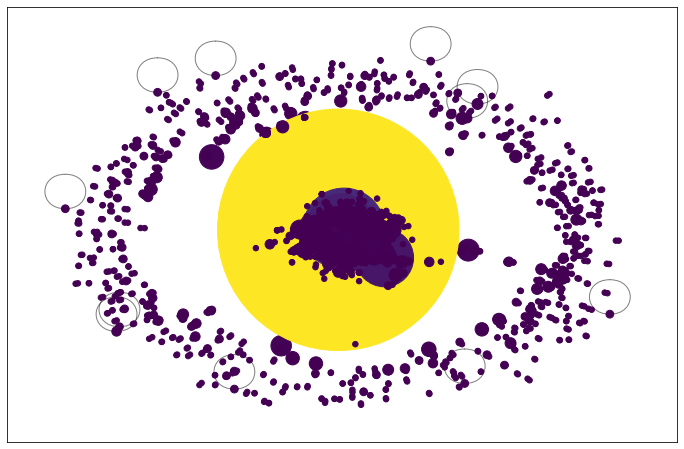

In [ ]:
%%script echo skipping
# cell ini akan diskip ketika rerun karena akan memakan waktu yang cukup lama
plt.subplots(figsize=(12,8))

d = nx.degree(G)
pos = nx.spring_layout(G, seed=1)
D = [d[node]*30 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=D, node_color=D)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5)
plt.show()

<details>
<summary ><font size=3><i>grafik seharusnya</i></font></summary>
<a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/graph%20tweet.png?raw=true><img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/graph%20tweet.png?raw=true></img></a>
<font size=4>
</details>
grafik diatas menunjukkan adanya satu akun yang sangat menjadi pusat perhatian/pengaruh (node yg berwarna kuning besar ditengah), selain itu juga beberapa akun yang memiliki pengaruh cukup kuat ditandai dengan ukuran yang cukup besar ditengah berwarna ungu. Untuk melihat bagaimana jenis pengaruh akun2 yang ada akan dilakukan centrality analysis.

### Centrality Analysis

In [ ]:
import operator
import numpy as np

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
        plt.show() # Show the graph
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

### Centrality by Degree
<font size=4>
metode ini akan menilai tingkat pentingnya akun berdasarkan banyaknya ia di-mention

In [ ]:
Gt = Centrality(G, N=20, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['jokowi', 'aniesbaswedan', 'ruhutsitompul', 'msaid', 'CNNIndonesia', 'OposisiCerdas', 'alisyarief', 'ganjarpranowo', 'na', 'geloraco', 'prabowo', 'RamliRizal', 'NasDem', 'HelmiFelis', 'bachrum', 'abu', 'Dennysiregar7', 'democrazymedia', 'PartaiSocmed', 'kpu']
Influencial Users Scores: [0.13814667 0.0319784  0.02039511 0.01591814 0.01492325 0.01243604
 0.01236498 0.01208073 0.01151222 0.01144116 0.01129903 0.01101478
 0.00994883 0.00938033 0.00859864 0.00838545 0.00831438 0.00831438
 0.00817226 0.00795907]


<font size=4>
akun tokoh Jokowi merupakan akun paling banyak di-mention, diikuti oleh Anies Baswedan dan beberapa tokoh lainnya. dapat dilihat bahwa keempat nama tokoh yang jadi pembahasan sebelumnya juga masuk dalam jajaran top 20 akun yang banyak di-mention.

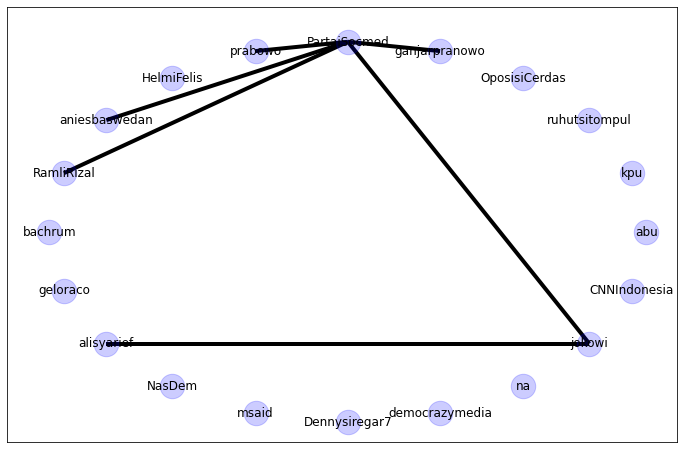

In [ ]:
plt.figure(figsize=(12,8))
drawGraph(Gt, True, layOut='circular')

<font size=4> akun PartaiSocmed adalah akun yang aktif berhubungan dengan berbagai akun-akun tokoh berpengaruh

### Closeness Centrality
<font size=4>
metode kali ini akan menilai pentingnya suatu akun berdasarkan kemampuannya menjangkau akun-akun lain dengan mudah.

In [ ]:
%%script echo skipping
# cell ini akan diskip ketika rerun karena algoritma yang berusaha menghitung 
# jarak antar setiap node(14 rb-an node) untuk mencari rute terpendeknya akan memakan waktu cukup lama

Gt = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['jokowi', 'MatJohar3', 'alisyarief', 'Syarman59', 'ParwantoAgus2', 'anakranto64', 'PartaiSocmed', '_SEKNAS_RI', 'MocangTian', 'PaimoMontok']
Influencial Users Scores: [0.27301844 0.23382924 0.22663328 0.2254969  0.22525594 0.22278608
 0.2224408  0.22179719 0.22153497 0.2211863 ]


<details>
    <summary><font size=3><i>output seharusnya</i></font></summary>
<img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/closeness1.png?raw=true>

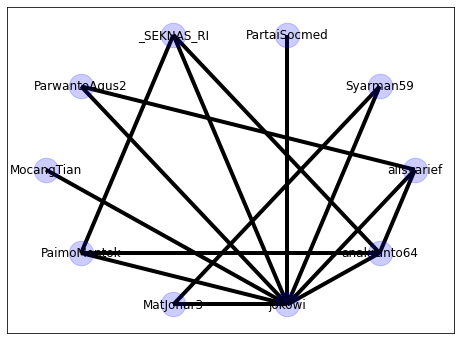

In [ ]:
%%script echo skipping
# karena data induknya pada cell sebelumnya diskip, maka cell ini juga perlu diskip

plt.figure(figsize=(8,6))
drawGraph(Gt, True, layOut='circular')

<details>
    <summary><font size=3><i>grafik seharusnya</i></font></summary>
<img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/closeness2.png?raw=true</img>
</details>
<font size=4>
kali ini akun Jokowi masih menjadi akun paling berpengaruh, akun ini dapat dengan mudah menggapai berbagai akun lainnya. Juga diikuti berbagai nama akun tokoh yang belum muncul sebelumnya

### Beetwenness Centrality
<font size=4> metode ini akan menilai pentingnya suatu akun berdasarkan kemampuan ia menjadi "jembatan" informasi antar berbagai akun.

In [ ]:
Gt = Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['jokowi', 'aniesbaswedan', 'ruhutsitompul', 'CNNIndonesia', 'msaid', 'MatJohar3', 'OposisiCerdas', 'kpu', 'Azlasy', 'geloraco']
Influencial Users Scores: [0.2733416  0.04877069 0.02579261 0.01804488 0.01744756 0.01734021
 0.01382549 0.01333874 0.01323965 0.01278376]


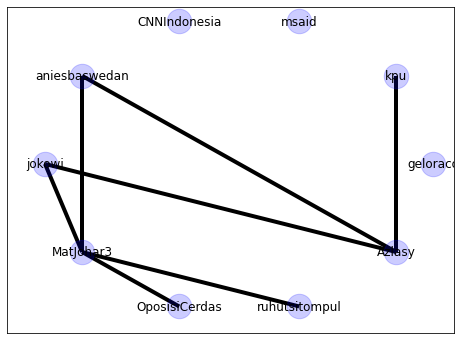

In [ ]:
plt.figure(figsize=(8,6))
drawGraph(Gt, True, layOut='circular')

<font size=4>
akun2 ini memiliki peran penting dalam distribusi informasi antar komunitas, jika akun2 ini berhenti beroperasi penyebaran informasi di twitter bisa terganggu dan terhambat.

### Eigenvector Centrality
<font size=4>
metode ini akan menilai pentingnya suatu akun berdasarkan kemampuannya "dilirik" oleh akun yang memiliki pengaruh kuat

In [ ]:
Gt = Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['jokowi', 'na', 'alisyarief', 'aniesbaswedan', 'PartaiSocmed', 'hnurwahid', 'ganjarpranowo', 'Syarman59', 'msaid', 'RamliRizal']
Influencial Users Scores: [0.68977393 0.06082368 0.04785794 0.04781092 0.03675793 0.03652223
 0.03136498 0.03052285 0.02940787 0.02919951]


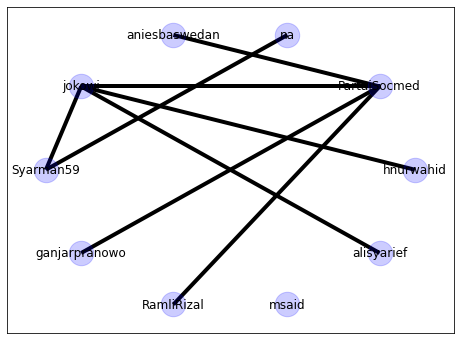

In [ ]:
plt.figure(figsize=(8,6))
drawGraph(Gt, True, layOut='circular')

<font size=4> akun2 yang memang sudah dideteksi memiliki pengaruh kuat tetap muncul di metode ini. beberapa akun tokoh seperti Jokowi, msaid, alisyarief hingga aniesbaswedan yang selalu dinilai oleh berbagai metode centrality menjadi akun penting & berpengaruh untuk topik pilpres 2024 di twitter. sementara akun non-tokoh yang selalu muncul dinilai sebagai akun penting dan berpengaruh adalah PartaiSocmed.

### Community Detection
<font size=4>
akun dilakukan pengelompokkan untuk melihat kemungkinan subtopik apa saja yang menjadi bahasan

In [ ]:
Gt = nx.algorithms.community.greedy_modularity_communities(G)

# lihat top 50 community
for community in Gt[:50]:
    print(community)

frozenset({'elrickynl', 'sebutajadhika', 'Jeza74422125', 'DaudnailaC', 'arkham1818', 'MoelyonovDjalil', 'sarda7tompul', 'NsarHaq', 'abahadilah', 'W', 'yuleko', 'JanganJadiPaok', 'Jaga', 'NongNayara', 'gatotka69145480', 'sarwono70', 'kurukatonacho', 'CTodolo', 'uyaboira', 'Orileys2', 'Ganesa', 'AzizahA97161751', 'anakbenteng71', 'AinuSalim', 'arya99915', 'densatjo', 'NKRI_NTBSasambo', 'Purnomo81853219', 'andika_yen', 'Myusuf_joozz', 'bacotradit', 'bachtiarihsanov', 'basoamir', 'Rudi09098805', 'Mengharapkeadi2', 'dablor24', 'Maiden666_', 'Rainsuryo00', 'crushonleviark', 'PolitikKekuatan', 'ker_asa', 'damarstwn', 'sitepusalim', 'mumungwisnu', '1ndonesiaku', 'JasindoID', 'cahyono_cs', 'bongpret', 'AbdulFa41793528', 'danty_luv', 'masayaharuhi', 'VkyR87', 'ArArmaja', 'ahdahni', 'SumahanP', 'kawananraja', 'Oladalah', 'Pai', 'HensuAja', 'Gunadiahmad3', 'kafiradikalis', 'ridwanadji4', 'BorisJohnson', 'zackers1992', 'Hudakeyy', 'ikhwannurrizal', 'OlgaLy_DIA', 'gakmaudua', 'IbraPanyalai', 'abeey'

In [ ]:
%%script echo skipping
# export untuk Gephi
nx.write_gexf(G, "tweet.gexf")


<center><a href=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/ss2.png?raw=true><img src=https://github.com/mdzakyjaya/Final_Project_ADM/blob/main/gambar/ss2.png?raw=true>
</img></a></center>

<p><font size=4>
dari ±14 ribu akun terbentuk ±3 ribu kelompok/komunitas. Pada komunitas terbesar juga terdapat akun dengan degree terbesar artinya komunitas yang besar itu (komunitas biru tua) terdapat akun (jokowi) yang mendapatkan mention terbanyak. Namun uniknya pada komunitas ini hanya akun jokowi saja yang punya pengaruh kuat sisanya tidak (node yg sangat kecil).
</font></p>

<p><font size=4>
Beda halnya dengan komunitas orange dimana komunitas ini tidak hanya memiliki jaringan yang luas, namun juga terdapat beberapa akun berpengaruh yaitu aniesbaswedan, prabowo, ganjarpranowo, YoutubeILC, NasDem dan airlangga.
</font></p>

<p><font size=4>
Sementara itu akun berpengaruh lainnya seperti KPU, Bawaslu, hingga kpu daerah mereka berada dalam satu komunitas hijau tua. Komunitas ini terlihat tidak begitu menonjol.
</font></p>

<p><font size=4>
Komunitas hijau muda banyak diisi oleh berbagai akun media berita seperti detikcom hingga keuangannews.
</font></p>

<p><font size=4>
akun ruhutsitompul tampak menonjol. Walaupun ia berada dalam komunitas abu muda yang tidak begitu luas jaringannya, besarnya ukuran node menandakan bahwa ia menjadi akun yang cukup berpengaruh jika dilihat dari banyaknya mention yang ia terima.
</font></p>

<p><font size=4>
<ul>
<li>komunitas biru tua adalah komunitas yang banyak membicarakan hal-hal yang berkaitan dengan Presiden Jokowi</li>
<li>komunitas orange banyak diisi oleh tokoh-tokoh berpengaruh yang akan berkontes menjadi capres di pilpres 2024, tweetnya banyak berisi tentang program-program dan kampanye</li>
<li>komunitas hijau tua diisi oleh lembaga yang berwenang untuk keberlangsungan proses Pilpres 2024, tweetnya banyak berisi tentang himbauan dan edukasi mengenai pilpres 2024</li>
<li>komunitas hijau muda yang diisi oleh media berita, tweetnya berisi tentang info2 dan berita2 tentang pilpres 2024</li>
<li>beberapa akun tokoh yang menonjol sepeti msaid, ruhutsitompul, Dennysiregar7, HelmiFelis, RamliRizal, MardaniAliSera, hingga alisyarief berada dalam komunitasnya masing-masing dengan bahasan-bahasan menegnai pilpres 2024 yang berbeda</li>
</ul>
</font></p>

#Penutup

<p><font size=4>
Berbagai tokoh yang menyatakan diri akan mencalonkan diri sebagai Capres di Pilpres 2024 muncul di berbagai tweet dalam jumlah yang cukup signifikan. Beberapa nama tokoh muncul dengan jumlah banyak pada saat ada berita yang membahas mereka, namun kemudia turun perlahan bersamaan dengan berlalunya berita-berita tersebut. Pemilu 2024 masih lebih dari 1 tahun lagi namun media sosial yang ada membuat kontestasi ini akan semakin ramai jika dilihat dari tweet mengenai topik ini yang terus meningkat dari waktu ke waktu. Berbagai macam subtopik pembicaraan yang ada membentuk berbagai komunitas dengan influencial account masing-masing. Banyak akun-akun yang memiliki pengaruh tinggi dalam menyebarluaskan informasi tentunya perlu menjadi perhatian agar informasi yang disebarkan adalah informasi yang benar dan tidak menimbulkan perselisihan & perpecahan.
</font></p>

<p><font size=4>
Projek ini masih bisa dikembangkan lagi misal:
<ul>
<li>menambah data dan memastikan keseimbangannya agar lebih akurat
<li>menerapkan sentiment analysis per-komunitas yang terbentuk untuk melihat kencederungan topik masin2 komunitas.
<li>menggunakan informasi geolokasi setiap akun untuk membuat peta sebaran
</ul>
</p>

\
Terimakasih.\
*Dzaky Jaya,*\
*30 Desember 2022*